In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

# Data Import

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9



|Code  | Description  |
|:---|:---|
|**crim** | per capita crime rate by town.|
|**zn** | proportion of residential land zoned for lots over 25,000 sq.ft.|
|**chas** | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).|
|**nox** | nitrogen oxides concentration (parts per 10 million).|
|**rm** | average number of rooms per dwelling.|
|**age** | proportion of owner-occupied units built prior to 1940.|
|**dis** | weighted mean of distances to five Boston employment centres.|
|**rad** | index of accessibility to radial highways.|
|**tax** | full-value property-tax rate per \$10,000.|
|**ptratio** |  pupil-teacher ratio by town.|
|**pupil** |teacher ratio by town.|
|**black** | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.|
|**lstat** | lower status of the population (percent).|
|**medv** | median value of owner-occupied homes in \$1000s.|

# Exploratory Data Analysis(EDA)

In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [5]:
df.shape

(333, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


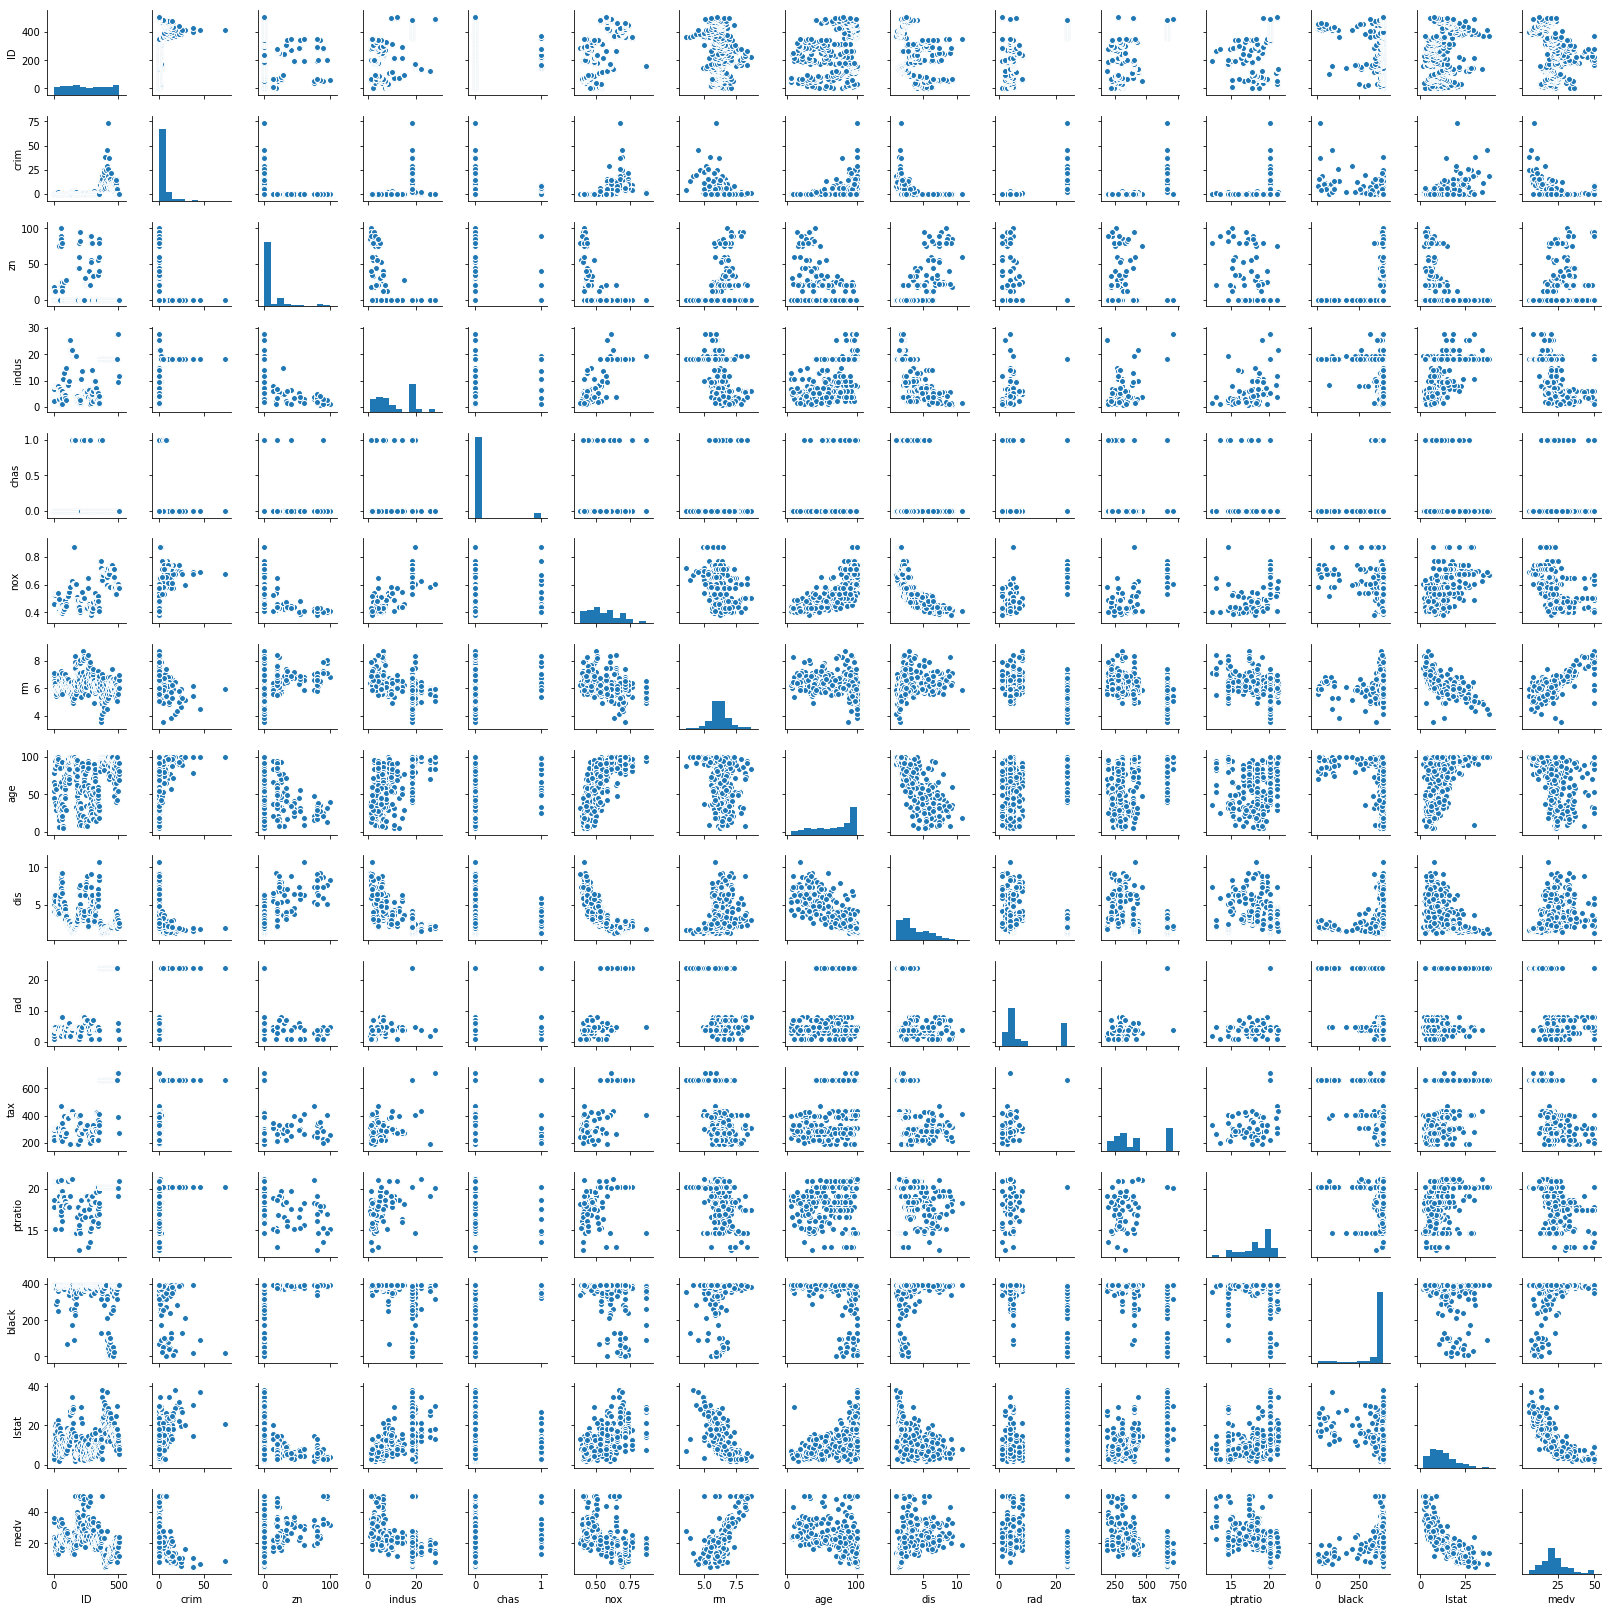

In [7]:
sns.pairplot(df,size=1.5)
plt.show()

In [8]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [9]:
study_col =['zn','indus','nox','rm']

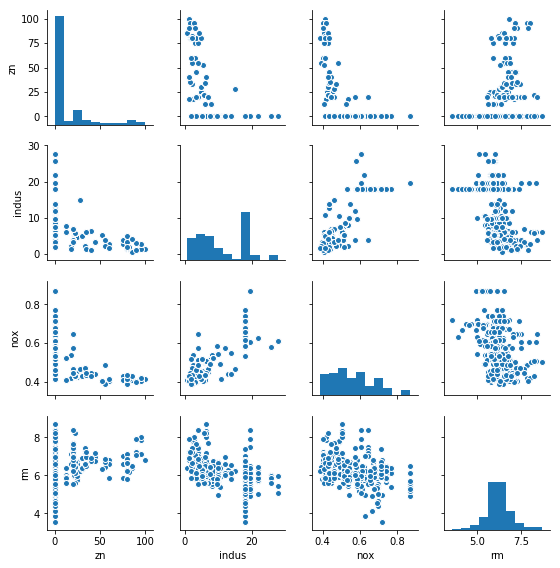

In [10]:
sns.pairplot(df[study_col],size=2)
plt.show()

In [11]:
study_col2 =['ptratio', 'black', 'lstat', 'medv']

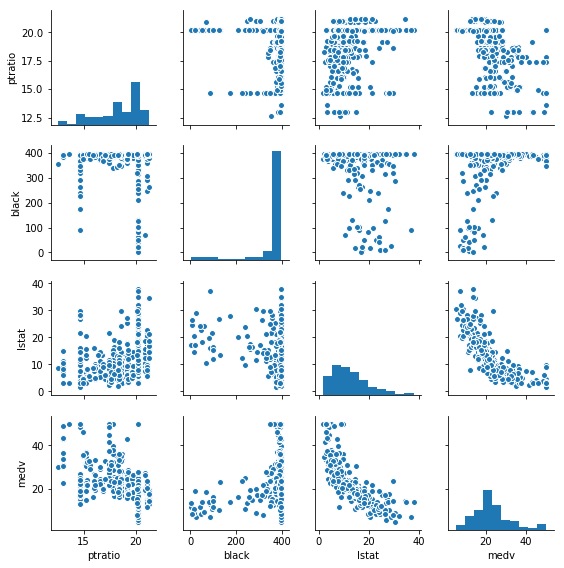

In [12]:
sns.pairplot(df[study_col2],size=2)
plt.show()

# Correlation Analysis and Feature Selection

In [13]:
pd.options.display.float_format= '{:,.3f}'.format

In [14]:
df.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000,0.456,-0.156,0.422,0.008,0.440,-0.113,0.257,-0.356,0.708,0.686,0.310,-0.272,0.282,-0.222
crim,0.456,1.000,-0.211,0.422,-0.041,0.463,-0.310,0.379,-0.397,0.667,0.617,0.313,-0.476,0.532,-0.407
zn,-0.156,-0.211,1.000,-0.519,-0.024,-0.502,0.328,-0.545,0.637,-0.304,-0.311,-0.380,0.168,-0.388,0.345
indus,0.422,0.422,-0.519,1.000,0.037,0.750,-0.440,0.638,-0.702,0.570,0.708,0.391,-0.335,0.614,-0.474
chas,0.008,-0.041,-0.024,0.037,1.000,0.080,0.112,0.068,-0.082,0.008,-0.022,-0.125,0.062,-0.050,0.204
nox,0.440,0.463,-0.502,0.750,0.080,1.000,-0.339,0.736,-0.769,0.612,0.671,0.193,-0.369,0.599,-0.413
rm,-0.113,-0.310,0.328,-0.440,0.112,-0.339,1.000,-0.249,0.269,-0.273,-0.357,-0.367,0.155,-0.616,0.690
age,0.257,0.379,-0.545,0.638,0.068,0.736,-0.249,1.000,-0.764,0.447,0.512,0.259,-0.268,0.589,-0.359
dis,-0.356,-0.397,0.637,-0.702,-0.082,-0.769,0.269,-0.764,1.000,-0.478,-0.530,-0.231,0.284,-0.506,0.249
rad,0.708,0.667,-0.304,0.570,0.008,0.612,-0.273,0.447,-0.478,1.000,0.904,0.471,-0.406,0.485,-0.352


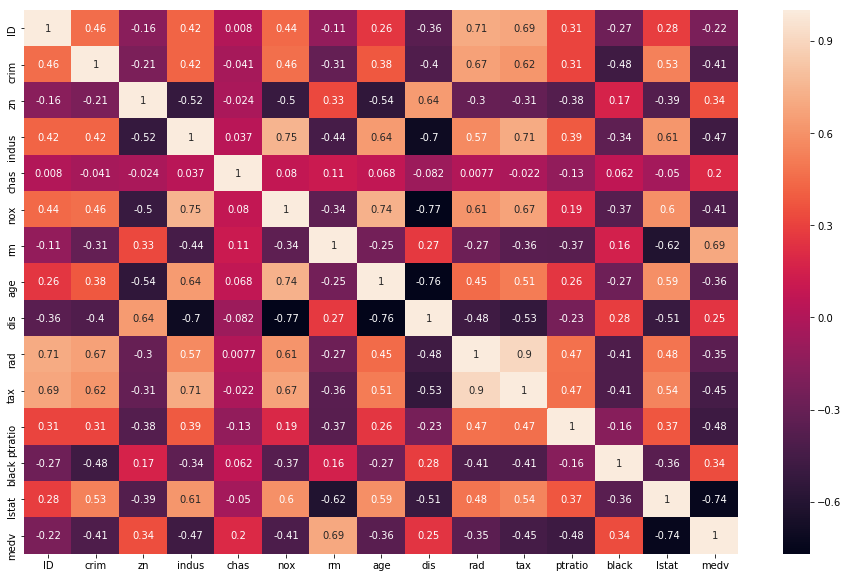

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Linear Rigression with Scikit-Learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df['rm'].values.reshape(-1,1)
X.shape

(333, 1)

In [18]:
y = df['medv'].values

In [19]:
model = LinearRegression()

In [20]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
model.coef_

array([8.98642214])

In [22]:
model.intercept_

-33.536725089605255

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


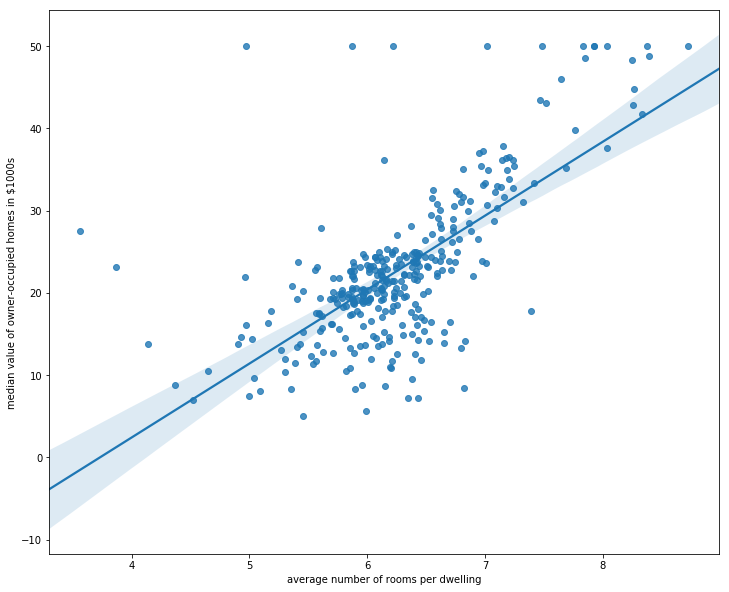

In [23]:
plt.figure(figsize=(12,10));
sns.regplot(X,y,data=df);
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s")
plt.show()

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


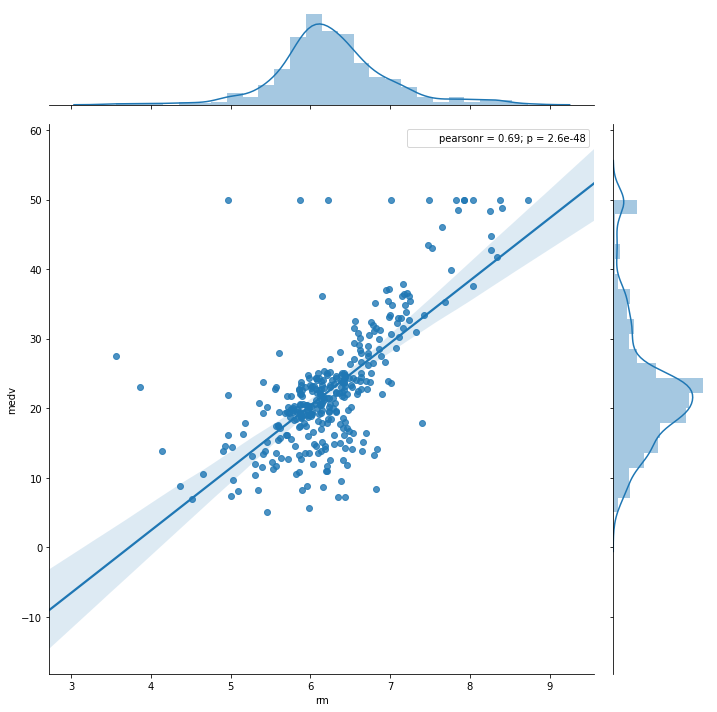

In [24]:
sns.jointplot(x='rm',y='medv',data=df,kind = 'reg',size=10)
plt.show()

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


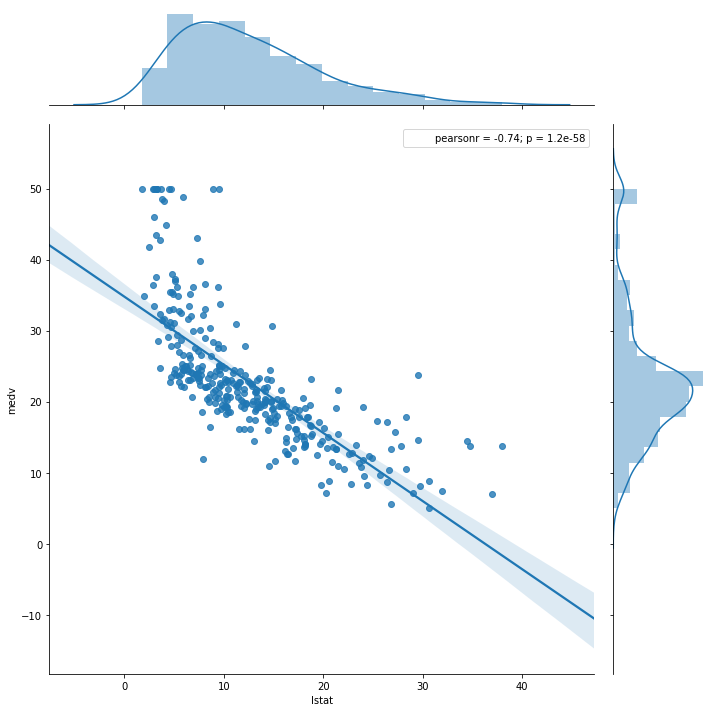

In [25]:
sns.jointplot(x='lstat',y='medv',data=df,kind = 'reg',size=10)
plt.show()

# Robust Regression

**RANSAC (RANdom SAmple Consensus) algorithm**

Each iteration performs the following steps:

1) Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).

2) Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).
3) Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.

4) Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [26]:
from sklearn.linear_model import RANSACRegressor

In [27]:
ransac = RANSACRegressor()

In [28]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [ ]:
ransac.predict()

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
ransac.fit(X_train,y_train)
y_train_pred = ransac.predict(X_train)
y_train_pred = ransac.predict(X_train)


In [71]:
mean_squared_error(y_train,y_train_pred)

35.520122607006456

In [73]:
mean_squared_error(y_test,y_test_pred)

25.478068415625692

In [74]:
from sklearn.metrics import r2_score

r2_score(y_train,y_train_pred)

0.585990219324384

In [75]:
r2_score(y_test,y_test_pred)

0.675704710423837

In [29]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [30]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))

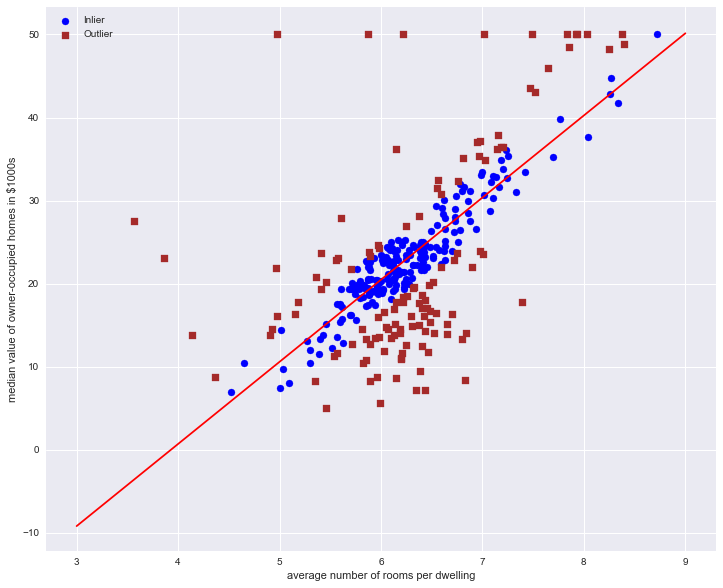

In [31]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inlier')
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='Outlier')
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s")
plt.plot(line_X,line_y_ransac, color='red')
plt.legend(loc='upper left')
plt.show()


In [32]:
ransac.estimator_.coef_

array([9.886566])

In [33]:
ransac.estimator_.intercept_

-38.8397174818073

# Performance Evalution of Regression Model

In [34]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_tarin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_train_pred = lr.predict(X_train)

In [39]:
y_test_pred = lr.predict(X_test)

In [79]:
lr.summary?

Object `lr.summary` not found.


# Method 1: Residual Analysis

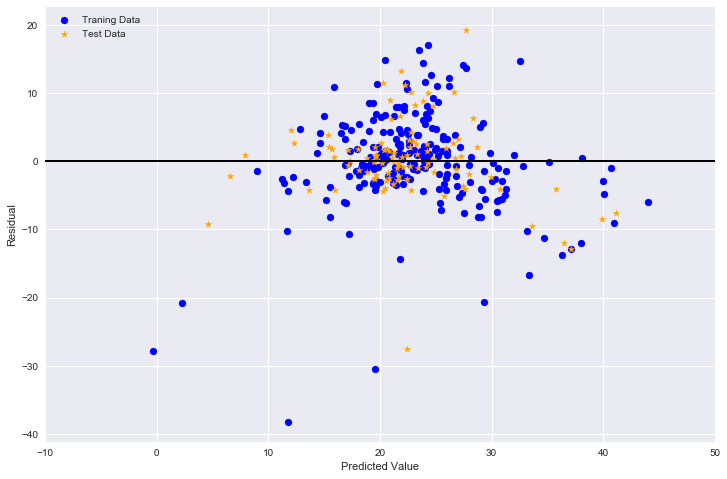

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Traning Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='orange',marker='*',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='k')
plt.xlim([-10,50])
plt.show()



# Method 2: Mean Squared Error(MSE)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_train,y_train_pred)

48.7082995981167

In [45]:
mean_squared_error(y_test,y_ test_pred)

33.33843742098521

***

 # Method 3: Coefficient of Determination, R^2

In [76]:
from sklearn.metrics import r2_score

r2_score(y_train,y_train_pred)


0.585990219324384

In [77]:
r2_score(y_test,y_test_pred)

0.675704710423837

***

# Try all features

In [56]:
X = df.iloc[:,:-1].values
y = df['medv'].values

In [57]:
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [4.0000e+00, 3.2370e-02, 0.0000e+00, ..., 1.8700e+01, 3.9463e+02,
        2.9400e+00],
       ...,
       [5.0300e+02, 4.5270e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [5.0400e+02, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [5.0600e+02, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_pred = lr.predict(X_train)


# Residual Analysis

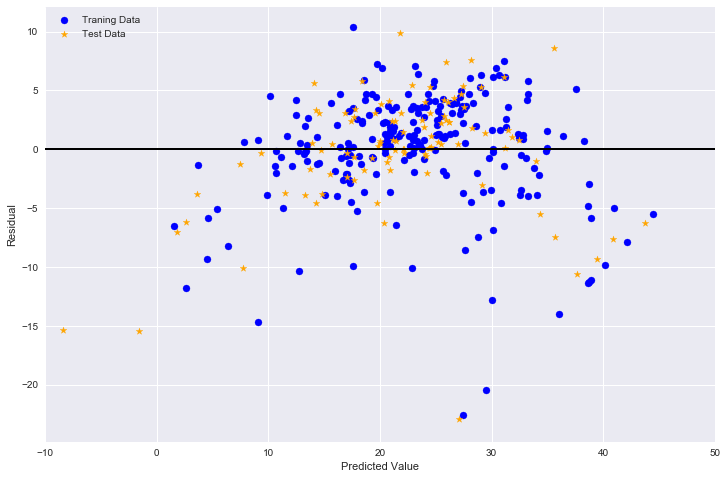

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Traning Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='orange',marker='*',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='k')
plt.xlim([-10,50])
plt.show()

# Mean Squared Error

In [64]:
mean_squared_error(y_train,y_train_pred)

22.031574066199457

In [66]:
mean_squared_error(y_test,y_test_pred)

25.478068415625692

# Coefficient of determination

In [67]:
r2_score(y_train,y_train_pred)

0.7432078923824823

In [68]:
r2_score(y_test,y_test_pred)

0.675704710423837